In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# LDAModel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# QDAModel
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
# KNNModel
from sklearn.neighbors import KNeighborsClassifier as KNN
# NaiveBayesModel
from sklearn.naive_bayes import GaussianNB as NaiveBayes
# DecisionTreeModel
from sklearn.tree import DecisionTreeClassifier as DecisionTree
# BaggingModel
from sklearn.ensemble import BaggingClassifier as Bagging
# AdaBoostModel
from sklearn.ensemble import AdaBoostClassifier as AdaBoost

In [15]:
# We import the data from a csv file
data = pd.read_csv('/mnt/c/Users/Saulo Mendes Santos/OneDrive/Documents/2. LETRAS/0. Doutorado/0. Recherche/1.5. Classification/results_dm_vfinal_standardized_withf0coeff_20231205.csv')

In [16]:
data

,filename,sample,file,utt,iu,position,dm_text,N_PU,speaker,stressed_vowel,...,ratio_min_f0_dm,ratio_max_f0_stressed_dm,ratio_min_f0_stressed_dm,zsil_mean,zsil_stressed_syl,dm_duration,coef_0,coef_1,coef_2,coef_3
0,bfamcv01__002__GIL,OLIVER,bfamcv01,2,CNT,0.0,ô,1,GIL,#o,...,0.983107,-0.304754,5.679705,-0.142,-0.142,0.108164,0.000017,-0.003885,0.059621,2.733920
1,bfamcv01__019__EVN,OLIVER,bfamcv01,19,EXP,0.0,No',1,EVN,#oh,...,0.160827,2.198977,-2.488045,-0.904,-0.904,0.147619,-0.000106,0.004373,-0.029251,-0.369788
2,bfamcv01__048__EVN,OLIVER,bfamcv01,48,CNT,0.0,ô,1,EVN,#oU,...,0.981160,-1.779314,3.764888,2.059,2.059,0.161825,0.000186,-0.011093,0.152832,-0.743381
3,bfamcv01__051__LUI,OLIVER,bfamcv01,51,EXP,0.0,ah,1,LUI,#a,...,0.001150,1.052422,-3.570504,0.083,0.083,0.135725,-0.000320,0.010525,0.018429,-2.202685
4,bfamcv01__051__LUI,OLIVER,bfamcv01,51,CNT,0.0,velho,2,LUI,#ehI,...,0.853244,-4.753377,1.759249,-0.004,-0.004,0.169890,0.000256,-0.014031,0.194063,-0.918259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,bpubmn01__097__SHE,OLIVER,bpubmn01,97,ALL,0.5,gente,4,SHE,#eN,...,0.569389,-34.570453,-36.209915,-1.557,-1.557,0.247738,0.000061,0.000548,-0.076060,1.669450
427,bpubmn01__098__SHE,OLIVER,bpubmn01,98,INP,0.0,porque,1,SHE,#e,...,0.623421,-1.201171,0.799796,0.525,0.525,0.205259,0.001220,-0.043119,0.329262,-1.249335
428,bpubmn01__110__SHE,OLIVER,bpubmn01,110,CNT,0.0,então o',1,SHE,#oh,...,0.433829,4.263828,-1.451185,-1.414,-1.414,0.093548,-0.000244,0.007431,-0.108439,2.847450
429,bpubmn10_13_70417_0_71030_0_NAMES,SAULO,bpubmn10,13,ALL,1.0,Junhia,2,Débora,#u,...,0.756404,-5.926195,1.424070,-0.279,-0.279,0.265592,0.000158,-0.000757,-0.187648,0.355966


In [17]:
# We need to check if there are any missing values in the data
data.isnull().sum()

filename                            0
sample                              0
file                                0
utt                                 0
iu                                  0
position                            0
dm_text                             7
N_PU                                0
speaker                            38
stressed_vowel                      0
mean_pitch_dm                       0
std_pitch_dm                        0
max_pitch_dm                        0
min_pitch_dm                        0
mean_intensity_dm                   0
std_intensity_dm                    0
max_intensity_dm                    0
min_intensity_dm                    0
mean_intensity_stressed_dm          0
mean_se_stressed_dm                 0
pitch_slope_dm                      0
pitch_slope_stressed_dm             0
pitch_range_dm                      0
pitch_slope_before_stressed_dm      0
pitch_slope_after_stressed_dm       1
ratio_max_intensity_dm              0
ratio_min_in

In [18]:
# We add a column that will encode the dm_text variable and the iu (which is going to be the target variable)
data['dm_text_encoded'] = data['dm_text'].astype('category').cat.codes
data['iu_encoded'] = data['iu'].astype('category').cat.codes

# We need to create a dictionary with the codes and the labels
dm_text_dict = dict(enumerate(data['dm_text'].astype('category').cat.categories))
iu_dict = dict(enumerate(data['iu'].astype('category').cat.categories))

In [19]:
# Let's encode y using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit label encoder
le.fit(data['iu'])

y = le.transform(data['iu'])



In [20]:
# Check the iu_dict and print the correspondig labels and codes
print(iu_dict)

{0: 'ALL', 1: 'CNT', 2: 'EVD', 3: 'EXP', 4: 'INP'}


In [21]:
# Check the dm_text_dict and print the correspondig labels and codes
print(dm_text_dict)

{0: 'Andréa', 1: 'Anete', 2: 'Antônio', 3: 'Bruno', 4: 'Carlão', 5: 'Cristina', 6: 'Cássia', 7: 'Elisa', 8: 'Eustáquio', 9: 'Fernando', 10: 'Flávia', 11: 'GENTE', 12: 'Getúlio', 13: 'Guilherme', 14: 'Heliana', 15: 'Heloísa', 16: 'Jael', 17: 'Janayna', 18: 'João', 19: 'Juliana', 20: 'Junhia', 21: 'Júnia', 22: 'Kelly', 23: 'Kátia', 24: 'Luciana', 25: 'Lívia', 26: 'Maira', 27: 'Marco', 28: 'Marisa', 29: 'Márcia', 30: 'Mércia', 31: 'Ninha', 32: "No'", 33: 'Nossa', 34: 'Onofre', 35: 'Plauto', 36: 'Priscila', 37: 'Regina', 38: 'Rena', 39: 'Renato', 40: 'Reninha', 41: 'Sonilde', 42: 'Tommaso', 43: 'Toninho', 44: 'William', 45: 'agora', 46: 'ah', 47: 'ah bom', 48: 'ah não', 49: 'ahn', 50: 'ai', 51: 'aqui', 52: "aqui o'", 53: 'aí', 54: 'bem', 55: 'bicho', 56: 'boba', 57: 'bom', 58: 'cara', 59: 'cê sabe', 60: 'cê vê', 61: 'dona Flávia', 62: 'doutor Fernando', 63: 'eh', 64: 'enfim', 65: 'entendeu', 66: 'então', 67: "então o' ", 68: 'gente', 69: 'hein', 70: 'hhh tá', 71: 'mas', 72: 'mas assim', 73

In [22]:
# Create a dictionary that encodes column names and their indexes
col_names = dict(enumerate(data.columns))

print(col_names)

{0: 'filename', 1: 'sample', 2: 'file', 3: 'utt', 4: 'iu', 5: 'position', 6: 'dm_text', 7: 'N_PU', 8: 'speaker', 9: 'stressed_vowel', 10: 'mean_pitch_dm', 11: 'std_pitch_dm', 12: 'max_pitch_dm', 13: 'min_pitch_dm', 14: 'mean_intensity_dm', 15: 'std_intensity_dm', 16: 'max_intensity_dm', 17: 'min_intensity_dm', 18: 'mean_intensity_stressed_dm', 19: 'mean_se_stressed_dm', 20: 'pitch_slope_dm', 21: 'pitch_slope_stressed_dm', 22: 'pitch_range_dm', 23: 'pitch_slope_before_stressed_dm', 24: 'pitch_slope_after_stressed_dm', 25: 'ratio_max_intensity_dm', 26: 'ratio_min_intensity_dm', 27: 'ratio_max_intensity_stressed_dm', 28: 'ratio_min_intensity_stressed_dm', 29: 'ratio_max_f0_dm', 30: 'ratio_min_f0_dm', 31: 'ratio_max_f0_stressed_dm', 32: 'ratio_min_f0_stressed_dm', 33: 'zsil_mean', 34: 'zsil_stressed_syl', 35: 'dm_duration', 36: 'coef_0', 37: 'coef_1', 38: 'coef_2', 39: 'coef_3', 40: 'dm_text_encoded', 41: 'iu_encoded'}


In [32]:
# We will try a first model with all the variables + postion. We do include the dm_text_encoded variable
# We will create a list with the indices of the variables that will be used in the model: 4 + 9 to 33
variables_01 = [5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 37, 38, 39]

# We get the data for the model and store it in X
X = data.iloc[:, variables_01].values

In [33]:
# Count unique values in the target variable
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0  68]
 [  1 139]
 [  2  75]
 [  3  69]
 [  4  80]]


In [34]:
# If check if there are missing values and replace them with the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# We fit the imputer to the data
imputer.fit(X)

# We transform the data
X_imputed = imputer.transform(X)

In [35]:
# We split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=21, stratify=y)

In [27]:
# We build a base LDA model
lda_model = LDA()

# We fit the model
lda_model.fit(X_train, y_train)

# We predict the test set
y_pred = lda_model.predict(X_test)

# We print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# We print the classification report
print(classification_report(y_test, y_pred))

[[12  3  2  0  0]
 [ 2 22  4  2  5]
 [ 0  1 16  1  1]
 [ 0  0  1 13  3]
 [ 0  2  0  5 13]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.79      0.63      0.70        35
           2       0.70      0.84      0.76        19
           3       0.62      0.76      0.68        17
           4       0.59      0.65      0.62        20

    accuracy                           0.70       108
   macro avg       0.71      0.72      0.71       108
weighted avg       0.72      0.70      0.70       108



In [28]:
# We do a KNN model
knn_model = KNN(n_neighbors=6)

# We fit the model
knn_model.fit(X_train, y_train)

# We predict the test set
y_pred_knn = knn_model.predict(X_test)

# We print the confusion matrix
print(confusion_matrix(y_test, y_pred_knn))

# We print the classification report
print(classification_report(y_test, y_pred_knn))


[[10  3  3  1  0]
 [ 4 23  2  3  3]
 [ 1  2 13  2  1]
 [ 0  1  2 11  3]
 [ 0  4  0  6 10]]
              precision    recall  f1-score   support

           0       0.67      0.59      0.62        17
           1       0.70      0.66      0.68        35
           2       0.65      0.68      0.67        19
           3       0.48      0.65      0.55        17
           4       0.59      0.50      0.54        20

    accuracy                           0.62       108
   macro avg       0.62      0.62      0.61       108
weighted avg       0.63      0.62      0.62       108



In [29]:
# We do a Naive Bayes model
nb_model = NaiveBayes()

# We fit the model
nb_model.fit(X_train, y_train)

# We predict the test set
y_pred_nb = nb_model.predict(X_test)

# We print the confusion matrix
print(confusion_matrix(y_test, y_pred_nb))

# We print the classification report
print(classification_report(y_test, y_pred_nb))

[[ 5  8  4  0  0]
 [ 4 16  2  3 10]
 [ 0  4 15  0  0]
 [ 0  2  1 12  2]
 [ 0  1  0  9 10]]
              precision    recall  f1-score   support

           0       0.56      0.29      0.38        17
           1       0.52      0.46      0.48        35
           2       0.68      0.79      0.73        19
           3       0.50      0.71      0.59        17
           4       0.45      0.50      0.48        20

    accuracy                           0.54       108
   macro avg       0.54      0.55      0.53       108
weighted avg       0.54      0.54      0.53       108



In [30]:
# Let's do a random forest model
rf_model = RandomForestClassifier(n_estimators=1000, random_state=21)

# We fit the model
rf_model.fit(X_train, y_train)

# We predict the test set
y_pred_rf = rf_model.predict(X_test)

# We print the confusion matrix
print(confusion_matrix(y_test, y_pred_rf))

# We print the classification report
print(classification_report(y_test, y_pred_rf))

[[10  4  3  0  0]
 [ 2 29  0  2  2]
 [ 0  3 15  0  1]
 [ 0  2  2  9  4]
 [ 0  5  0  8  7]]
              precision    recall  f1-score   support

           0       0.83      0.59      0.69        17
           1       0.67      0.83      0.74        35
           2       0.75      0.79      0.77        19
           3       0.47      0.53      0.50        17
           4       0.50      0.35      0.41        20

    accuracy                           0.65       108
   macro avg       0.65      0.62      0.62       108
weighted avg       0.65      0.65      0.64       108



In [31]:
# Let's do a gradient boosting model, we want to use a verbose to see the progress of the model
gb_model = GradientBoostingClassifier(n_estimators=1000, random_state=21, verbose=1)

# We fit the model
gb_model.fit(X_train, y_train)

# We predict the test set
y_pred_gb = gb_model.predict(X_test)

# We print the confusion matrix
print(confusion_matrix(y_test, y_pred_gb))

# We print the classification report
print(classification_report(y_test, y_pred_gb))


      Iter       Train Loss   Remaining Time 
         1           1.3315            1.09m
         2           1.1697            1.11m
         3           1.0426           55.67s
         4           0.9359           51.03s
         5           0.8477           46.70s
         6           0.7755           43.29s
         7           0.7094           39.76s
         8           0.6530           37.21s
         9           0.6044           35.46s
        10           0.5606           33.94s
        20           0.2861           27.60s
        30           0.1711           27.96s
        40           0.1117           28.24s
        50           0.0751           28.27s
        60           0.0511           26.98s
        70           0.0348           25.57s
        80           0.0250           24.85s
        90           0.0177           23.84s
       100           0.0127           23.74s
       200           0.0006           20.24s
       300           0.0000           17.06s
       40

In [36]:
# We want to try a bagging model
bag_model = Bagging(n_estimators=1000, random_state=21)

# We fit the model
bag_model.fit(X_train, y_train)

# We predict the test set
y_pred_bag = bag_model.predict(X_test)

# We print the confusion matrix
print(confusion_matrix(y_test, y_pred_bag))

# We print the classification report
print(classification_report(y_test, y_pred_bag))

[[10  4  3  0  0]
 [ 1 29  1  2  2]
 [ 0  1 17  0  1]
 [ 0  1  0 14  2]
 [ 0  4  0  7  9]]
              precision    recall  f1-score   support

           0       0.91      0.59      0.71        17
           1       0.74      0.83      0.78        35
           2       0.81      0.89      0.85        19
           3       0.61      0.82      0.70        17
           4       0.64      0.45      0.53        20

    accuracy                           0.73       108
   macro avg       0.74      0.72      0.72       108
weighted avg       0.74      0.73      0.72       108



In [37]:
# We want to try an AdaBoost model
ada_model = AdaBoost(n_estimators=1000, random_state=21)

# We fit the model
ada_model.fit(X_train, y_train)

# We predict the test set
y_pred_ada = ada_model.predict(X_test)

# We print the confusion matrix
print(confusion_matrix(y_test, y_pred_ada))

# We print the classification report
print(classification_report(y_test, y_pred_ada))

[[ 0 10  7  0  0]
 [ 0 28  1  3  3]
 [ 0  1 18  0  0]
 [ 0  1  1 15  0]
 [ 0  4  0 14  2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.64      0.80      0.71        35
           2       0.67      0.95      0.78        19
           3       0.47      0.88      0.61        17
           4       0.40      0.10      0.16        20

    accuracy                           0.58       108
   macro avg       0.43      0.55      0.45       108
weighted avg       0.47      0.58      0.49       108



/home/saulo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/saulo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/saulo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# We want to try a decision tree model
dt_model = DecisionTree(random_state=21)

# We fit the model
dt_model.fit(X_train, y_train)

# We predict the test set
y_pred_dt = dt_model.predict(X_test)

# We print the confusion matrix
print(confusion_matrix(y_test, y_pred_dt))

# We print the classification report
print(classification_report(y_test, y_pred_dt))


[[11  3  3  0  0]
 [ 2 23  2  1  7]
 [ 3  1 14  0  1]
 [ 1  0  0 13  3]
 [ 0  4  0  7  9]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        17
           1       0.74      0.66      0.70        35
           2       0.74      0.74      0.74        19
           3       0.62      0.76      0.68        17
           4       0.45      0.45      0.45        20

    accuracy                           0.65       108
   macro avg       0.64      0.65      0.64       108
weighted avg       0.65      0.65      0.65       108



In [39]:
# We want to try a SVM model
svm_model = SVC(random_state=21)

# We fit the model
svm_model.fit(X_train, y_train)

# We predict the test set
y_pred_svm = svm_model.predict(X_test)

# We print the confusion matrix
print(confusion_matrix(y_test, y_pred_svm))

# We print the classification report
print(classification_report(y_test, y_pred_svm))


[[ 7  5  4  1  0]
 [ 1 27  2  1  4]
 [ 0  2 12  1  4]
 [ 0  2  2  8  5]
 [ 0  4  0  6 10]]
              precision    recall  f1-score   support

           0       0.88      0.41      0.56        17
           1       0.68      0.77      0.72        35
           2       0.60      0.63      0.62        19
           3       0.47      0.47      0.47        17
           4       0.43      0.50      0.47        20

    accuracy                           0.59       108
   macro avg       0.61      0.56      0.57       108
weighted avg       0.62      0.59      0.59       108



In [40]:
# We want to try a QDA model
qda_model = QDA()

# We fit the model
qda_model.fit(X_train, y_train)

# We predict the test set
y_pred_qda = qda_model.predict(X_test)

# We print the confusion matrix
print(confusion_matrix(y_test, y_pred_qda))

# We print the classification report
print(classification_report(y_test, y_pred_qda))


[[ 8  8  1  0  0]
 [ 6 16  1  0 12]
 [ 0  5 14  0  0]
 [ 2  5  0  8  2]
 [ 0  4  0  5 11]]
              precision    recall  f1-score   support

           0       0.50      0.47      0.48        17
           1       0.42      0.46      0.44        35
           2       0.88      0.74      0.80        19
           3       0.62      0.47      0.53        17
           4       0.44      0.55      0.49        20

    accuracy                           0.53       108
   macro avg       0.57      0.54      0.55       108
weighted avg       0.55      0.53      0.53       108



/home/saulo/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [41]:
# We want to try a logistic regression model
lr_model = LogisticRegression(random_state=21)

# We fit the model
lr_model.fit(X_train, y_train)

# We predict the test set
y_pred_lr = lr_model.predict(X_test)

# We print the confusion matrix
print(confusion_matrix(y_test, y_pred_lr))

# We print the classification report
print(classification_report(y_test, y_pred_lr))

[[10  4  3  0  0]
 [ 1 26  2  3  3]
 [ 0  2 14  0  3]
 [ 1  1  1  9  5]
 [ 0  2  0  6 12]]
              precision    recall  f1-score   support

           0       0.83      0.59      0.69        17
           1       0.74      0.74      0.74        35
           2       0.70      0.74      0.72        19
           3       0.50      0.53      0.51        17
           4       0.52      0.60      0.56        20

    accuracy                           0.66       108
   macro avg       0.66      0.64      0.64       108
weighted avg       0.67      0.66      0.66       108



/home/saulo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# Lets do an MLP Classifier model
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(random_state=21)

# We fit the model
mlp_model.fit(X_train, y_train)

# We predict the test set
y_pred_mlp = mlp_model.predict(X_test)

# We print the confusion matrix
print(confusion_matrix(y_test, y_pred_mlp))

# We print the classification report
print(classification_report(y_test, y_pred_mlp))

[[ 9  5  3  0  0]
 [ 1 26  0  3  5]
 [ 0  1 16  0  2]
 [ 0  2  2  9  4]
 [ 0  2  0  6 12]]
              precision    recall  f1-score   support

           0       0.90      0.53      0.67        17
           1       0.72      0.74      0.73        35
           2       0.76      0.84      0.80        19
           3       0.50      0.53      0.51        17
           4       0.52      0.60      0.56        20

    accuracy                           0.67       108
   macro avg       0.68      0.65      0.65       108
weighted avg       0.69      0.67      0.67       108



/home/saulo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
# Lets try a Passive Aggressive Classifier model
from sklearn.linear_model import PassiveAggressiveClassifier

pa_model = PassiveAggressiveClassifier(random_state=21)

# We fit the model
pa_model.fit(X_train, y_train)

# We predict the test set
y_pred_pa = pa_model.predict(X_test)

# We print the confusion matrix
print(confusion_matrix(y_test, y_pred_pa))

# We print the classification report
print(classification_report(y_test, y_pred_pa))

[[ 3 10  4  0  0]
 [ 3 25  0  2  5]
 [ 2  2 14  0  1]
 [ 0  3  1 11  2]
 [ 2  3  0  0 15]]
              precision    recall  f1-score   support

           0       0.30      0.18      0.22        17
           1       0.58      0.71      0.64        35
           2       0.74      0.74      0.74        19
           3       0.85      0.65      0.73        17
           4       0.65      0.75      0.70        20

    accuracy                           0.63       108
   macro avg       0.62      0.60      0.61       108
weighted avg       0.62      0.63      0.62       108



In [59]:
#https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier

# Lets try a Voting Classifier model with the best models
from sklearn.ensemble import VotingClassifier

# We create a list with the models
estimators = [('rf', rf_model), ('gb', gb_model), ('bag', bag_model), ('ada', ada_model), ('dt', dt_model), ('svm', svm_model), ('qda', qda_model), ('lr', lr_model), ('mlp', mlp_model), ('pa', pa_model)]

# We create the voting classifier
voting_model = VotingClassifier(estimators=estimators, voting='hard')

# We fit the model
voting_model.fit(X_train, y_train)

# We predict the test set
y_pred_voting = voting_model.predict(X_test)

# We print the confusion matrix
print(confusion_matrix(y_test, y_pred_voting))

# We print the classification report
print(classification_report(y_test, y_pred_voting))

#TODO: We should no get all the models

      Iter       Train Loss   Remaining Time 
         1           1.3325           18.57s
         2           1.1726           18.06s
         3           1.0464           17.49s
         4           0.9462           17.07s
         5           0.8568           17.82s
         6           0.7849           18.21s
         7           0.7162           18.95s
         8           0.6585           19.56s
         9           0.6082           19.80s
        10           0.5653           20.64s
        20           0.2985           21.92s
        30           0.1835           20.55s
        40           0.1219           19.78s
        50           0.0820           19.00s
        60           0.0587           18.66s
        70           0.0426           18.07s
        80           0.0300           17.81s
        90           0.0215           17.35s
       100           0.0158           17.10s
       200           0.0007           14.52s
       300           0.0000           12.79s
       40

/home/saulo/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/saulo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/saulo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[ 8  4  5  0  0]
 [ 2 29  0  2  2]
 [ 0  2 17  0  0]
 [ 0  2  2 11  2]
 [ 0  6  0  6  8]]
              precision    recall  f1-score   support

           0       0.80      0.47      0.59        17
           1       0.67      0.83      0.74        35
           2       0.71      0.89      0.79        19
           3       0.58      0.65      0.61        17
           4       0.67      0.40      0.50        20

    accuracy                           0.68       108
   macro avg       0.69      0.65      0.65       108
weighted avg       0.68      0.68      0.66       108



In [44]:
# We should now try some method to choose the best features for the model. A feature selection method
# We will use the Recursive Feature Elimination method
from sklearn.feature_selection import RFE

# We will use the LDAModel as the estimator

# We create the RFE model and select 8 attributes
rfe_model = RFE(lda_model, n_features_to_select=8)

# We fit the model
rfe_model.fit(X_train, y_train)

# We print the results
print("Num Features: %d" % rfe_model.n_features_)
print("Selected Features: %s" % rfe_model.support_)
print("Feature Ranking: %s" % rfe_model.ranking_)
print("Feature Names: %s" % data.columns[variables_01])

# Print the names of the selected features
print(data.columns[variables_01][rfe_model.support_])

# Print the names of all features as ranked by the RFE
print(data.columns[variables_01][rfe_model.ranking_])

Num Features: 8
Selected Features: [ True False False False False  True False  True False False False False
 False False False False  True False False False  True False False False
 False  True  True  True False]
Feature Ranking: [ 1  9  6 10 12  1  3  1  5  4 11 19 20 16 21 22  1  8 17 14  1  2 13 18
 15  1  1  1  7]
Feature Names: Index(['position', 'mean_pitch_dm', 'std_pitch_dm', 'max_pitch_dm',
       'min_pitch_dm', 'mean_intensity_dm', 'std_intensity_dm',
       'max_intensity_dm', 'min_intensity_dm', 'mean_intensity_stressed_dm',
       'mean_se_stressed_dm', 'pitch_slope_dm', 'pitch_slope_stressed_dm',
       'pitch_range_dm', 'pitch_slope_before_stressed_dm',
       'pitch_slope_after_stressed_dm', 'ratio_max_intensity_dm',
       'ratio_min_intensity_dm', 'ratio_max_intensity_stressed_dm',
       'ratio_min_intensity_stressed_dm', 'ratio_max_f0_dm', 'ratio_min_f0_dm',
       'ratio_max_f0_stressed_dm', 'ratio_min_f0_stressed_dm',
       'zsil_stressed_syl', 'coef_0', 'coef_1

/home/saulo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saulo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/home/saulo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saulo/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/home/saulo/.local/lib/python3.10/site-packages/sklearn/utils/_response.py", line 85, in _get_response_values
    y_pred = prediction_method(X)
  File "/home/saulo/.local/lib/python3.10/site-packages/sklearn/linear_model/_base.py", line 451, in predict
    scores = self.decision_function(X)
  File "/home/s

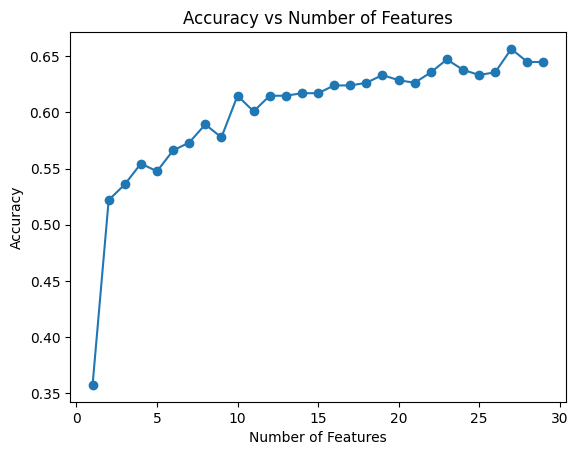

In [46]:
# Let's try select k best
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X is your feature matrix and y is your target variable
# X, y = ...

# Step 1: Feature scaling (if needed)

# Step 2: Initial LDA model
lda_02 = LinearDiscriminantAnalysis()
initial_accuracy = np.mean(cross_val_score(lda_02, X, y, cv=5, scoring='accuracy'))

# Step 3: Feature selection
feature_range = range(1, X.shape[1] + 1)
accuracies = []

for num_features in feature_range:
    # Select top k features using ANOVA F-value
    selector = SelectKBest(f_classif, k=num_features)
    X_selected = selector.fit_transform(X_imputed, y)

    # Step 4: Train LDA model
    lda = LinearDiscriminantAnalysis()
    accuracy = np.mean(cross_val_score(lda, X_selected, y, cv=5, scoring='accuracy'))
    accuracies.append(accuracy)

# Step 5: Plotting
plt.plot(feature_range, accuracies, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features')
plt.show()


## BAGGING MODEL

In [48]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Assuming you have your data loaded in X_imputed and y
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Define base classifiers and their parameter grids for tuning
base_classifiers = {
    'LDA': LinearDiscriminantAnalysis(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier()
}

param_grids = {
    'LDA__n_components': [1, 2, 3, 4],
    'DecisionTree__base_estimator__max_depth': [None, 5, 10, 15],
    'DecisionTree__base_estimator__min_samples_split': [2, 5, 10],
    'LogisticRegression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'KNN__n_neighbors': [3, 5, 7, 9],
    'KNN__p': [1, 2]
}

# Lists to store results
accuracy_scores = []

# 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for base_classifier_name, base_classifier in base_classifiers.items():
    # Create a pipeline for each base classifier
    pipeline = Pipeline([
        (base_classifier_name, base_classifier),
        ('bagging', BaggingClassifier(random_state=42))
    ])

    param_grid = param_grids.copy()
    param_grid.update({f'{base_classifier_name}__{key}': value for key, value in param_grids.items()})

    # GridSearchCV to find the best parameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring='accuracy', verbose=3)
    grid_search.fit(X_train, y_train)

    # Get the best classifier from the grid search
    best_bagging_classifier = grid_search.best_estimator_

    # Evaluate on the test set
    y_pred = best_bagging_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store the results
    accuracy_scores.append((base_classifier_name, grid_search.best_params_, accuracy))

# Print the results
for result in accuracy_scores:
    print(f"{result[0]} - Best Parameters: {result[1]}, Test Accuracy: {result[2]}")
